# 22장 시퀀스 배열로 다루는 순환 신경망

## 1. LSTM을 이용한 로이터 뉴스 카테고리 분류하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터를 확인해 보겠습니다.
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [2]:
# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩 처리를 합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 실행 옵션을 정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.3942 - loss: 2.4546 - val_accuracy: 0.4947 - val_loss: 1.9214
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.5377 - loss: 1.7937 - val_accuracy: 0.5646 - val_loss: 1.7088
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.5798 - loss: 1.6341 - val_accuracy: 0.6135 - val_loss: 1.5531
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.6430 - loss: 1.4198 - val_accuracy: 0.6487 - val_loss: 1.4028
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.6661 - loss: 1.3057 - val_accuracy: 0.6456 - val_loss: 1.3935
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7087 - loss: 1.1245 - val_accuracy: 0.6710 - val_loss: 1.2695
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7315 - loss: 1.0672 - val_accuracy: 0.6995 - val_loss: 1.1777
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7565 - loss: 0

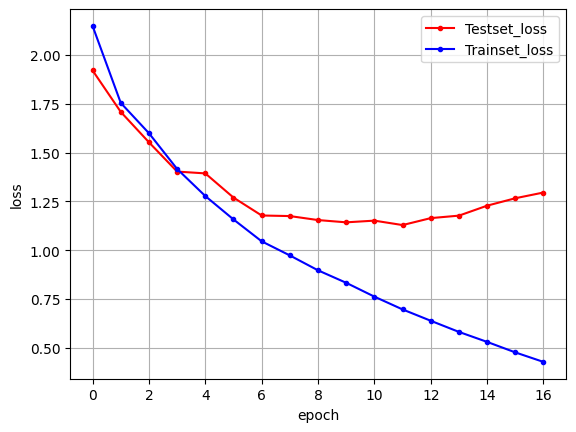

In [3]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 2. LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 61ms/step - accuracy: 0.6876 - loss: 0.5419 - val_accuracy: 0.8862 - val_loss: 0.2857
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9085 - loss: 0.2313 - val_accuracy: 0.8923 - val_loss: 0.2672
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.9378 - loss: 0.1701 - val_accuracy: 0.8962 - val_loss: 0.2654
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.9543 - loss: 0.1327 - val_accuracy: 0.8912 - val_loss: 0.2878
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9635 - loss: 0.1040 - val_accuracy: 0.8830 - val_loss: 0.3264
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.9691 - loss: 0.0919 - val_accuracy: 0.8846 - val_loss: 0.3500
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8754 - loss: 0.3733

 Test Accuracy: 0.8760


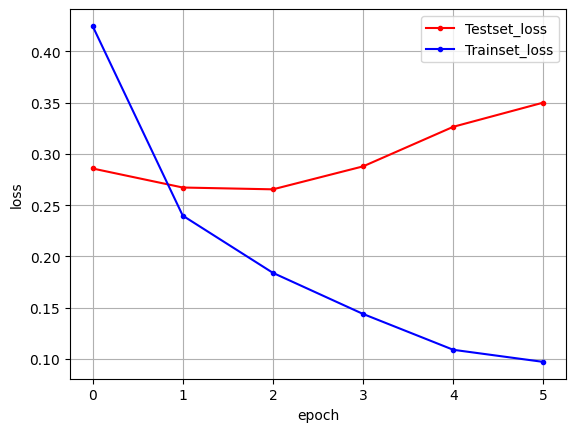

In [6]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 3. Seq2Seq 모델과 어텐션

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 4.1103 - val_accuracy: 0.0000e+00 - val_loss: 4.1084
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.2500 - loss: 4.0951 - val_accuracy: 0.0000e+00 - val_loss: 4.1007
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5000 - loss: 4.0795 - val_accuracy: 0.0000e+00 - val_loss: 4.0928
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.5000 - loss: 4.0629 - val_accuracy: 0.0000e+00 - val_loss: 4.0843
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.5000 - loss: 4.0444 - val_accuracy: 0.0000e+00 - val_loss: 4.0749
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5000 - loss: 4.0232 - val_accuracy: 0.0000e+00 - val_loss: 4.0644
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5000 - loss: 3.9985 - val_accuracy: 0.0000e+00 - val_loss: 4.0524
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.5000 - loss: 3.9691 - val

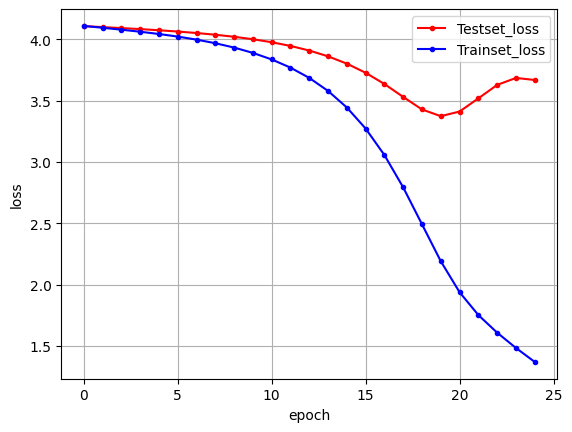

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# 예제용 데이터셋
# 한국어 입력 (X_data)
# "오늘 날씨 어때"   → [1, 2, 3]
# "오늘 주가 얼마"   → [1, 4, 5]
# "날씨가 점점 따뜻해" → [6, 7, 8]
X_data = [
    [1, 2, 3],
    [1, 4, 5],
    [6, 7, 8]
]

# 영어 출력 (Y_data)
# "It is warm"  → [10, 20, 30]
# "It is high"  → [10, 20, 50]
# "Getting warm" → [60, 30]
Y_data = [
    [10, 20, 30],
    [10, 20, 50],
    [60, 30]
]

# 패딩
X_train = pad_sequences(X_data, maxlen=5)  # 입력 시퀀스를 길이 5로 맞춤
Y_train = pad_sequences(Y_data, maxlen=4)  # 출력 시퀀스를 길이 4로 맞춤

# 입력 단어 집합 크기와 출력 단어 집합 크기 자동 설정
# np.max(X_train)와 np.max(Y_train)을 통해 등장하는 단어의 최댓값(인덱스)를 구한 뒤, +1을 해준다.
input_vocab_size = np.max(X_train) + 1
output_vocab_size = np.max(Y_train) + 1

# 원-핫 인코딩 (출력 데이터용)
y_train = to_categorical(Y_train, num_classes=output_vocab_size)

# 인코더 정의
encoder_inputs = Input(shape=(5,))
enc_emb = Embedding(input_dim=input_vocab_size, output_dim=64)(encoder_inputs)
encoder_lstm = LSTM(128, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)

# 디코더 정의
decoder_inputs = Input(shape=(4,))
dec_emb = Embedding(input_dim=output_vocab_size, output_dim=64)(decoder_inputs)
decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])
decoder_dense = Dense(output_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# 모델 구성
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
history = model.fit([X_train, Y_train], y_train, batch_size=2, epochs=25, validation_split=0.2)

# 학습 과정 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
